In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox

In [20]:
file3 = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
file3

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


## Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [ ]:
numerical=file3.select_dtypes(include=np.number)
numerical

In [ ]:
categorical=file3.select_dtypes(include=object)
categorical

## Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution

In [ ]:
### Use seaborn library to construct distribution plots for the numerical variables
sns.pairplot(numerical)
numerical

In [ ]:
### Use Matplotlib to construct histograms
numerical.hist(figsize=(12,12))

In [ ]:
### Do the distributions for different numerical variables look like a normal distribution
No

In [ ]:
from IPython.display import Image
Image ("data/stanorm.jpeg")

### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable.

In [ ]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

### Optional: Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.
As is visible, the features are correlated only in points smaller than 0,9


# Activity 4 (Thursday)
Show a plot of the total number of responses.
Show a plot of the response by the sales channel.
Show a plot of the response by the total claim amount.
Show a plot of the response by income.
(Optional) Don't limit your creativity! plot any interesting findings/insights that describe some interesting facts about your data set and its variables.
Plot the Correlation Heatmap.
Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

## Show a plot of the total number of responses.

In [23]:
responses = file3['response'].value_counts()
responses

no     9316
yes    1373
Name: response, dtype: int64

Text(0, 0.5, '#responses')

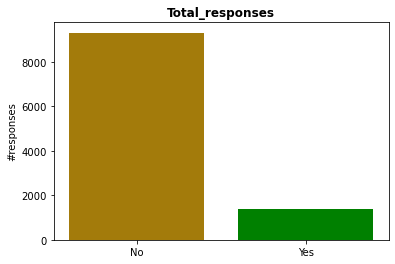

In [30]:
plt.bar(responses.index, responses, color=('#a37b0b','green'))
plt.title('Total_responses', fontweight='bold')
plt.xticks(ticks=[0,1],labels=["No","Yes"])
plt.ylabel("#responses")

## Show a plot of the response by the sales channel.

In [52]:
response_channel = file3.groupby(['sales_channel','response'])['region'].count().reset_index()
response_channel

,sales_channel,response,region
0,agent,no,3340
1,agent,yes,679
2,branch,no,2665
3,branch,yes,310
4,call center,no,1890
5,call center,yes,209
6,web,no,1421
7,web,yes,175


In [53]:
sns.set_palette('RdYlGn')
palette_alive = {"yes": "C5", "no": "C0"}

<AxesSubplot:title={'center':'Response by the sales channel'}, xlabel='sales_channel', ylabel='region'>

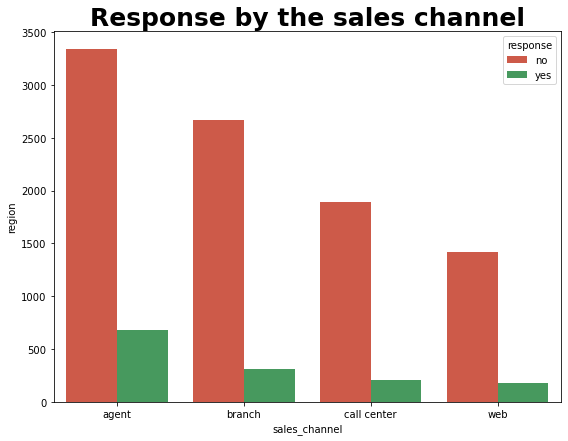

In [56]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Response by the sales channel', size='25', fontweight='bold')

sns.barplot(x = response_channel['sales_channel'],y = response_channel['region'], hue = response_channel['response'], palette=palette_alive)

## Show a plot of the response by the total claim amount.

In [61]:
response_channel = file3.groupby(['response','total_claim_amount'])['region'].count().reset_index()
response_channel

,response,total_claim_amount,region
0,no,0,9
1,no,1,9
2,no,2,12
3,no,3,9
4,no,4,12
...,...,...,...
1358,yes,1324,7
1359,yes,1358,6
1360,yes,1416,1
1361,yes,1443,1


<AxesSubplot:title={'center':'Response by total claim amount'}, xlabel='total_claim_amount', ylabel='response'>

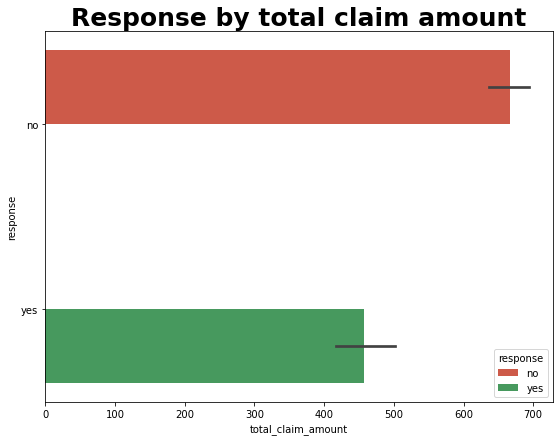

In [65]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Response by total claim amount', size='25', fontweight='bold')

sns.barplot(x = response_channel['total_claim_amount'],y = response_channel['response'], hue = response_channel['response'], palette=palette_alive)

In [ ]:
## Show a plot of the response by income.

In [67]:
response_channel = file3.groupby(['response','income'])['region'].count().reset_index()
response_channel

,response,income,region
0,no,10037,1
1,no,10074,1
2,no,10088,1
3,no,10097,2
4,no,10105,1
...,...,...,...
8344,yes,98714,1
8345,yes,99196,1
8346,yes,99265,1
8347,yes,99742,1


<AxesSubplot:title={'center':'Response by income'}, xlabel='income', ylabel='response'>

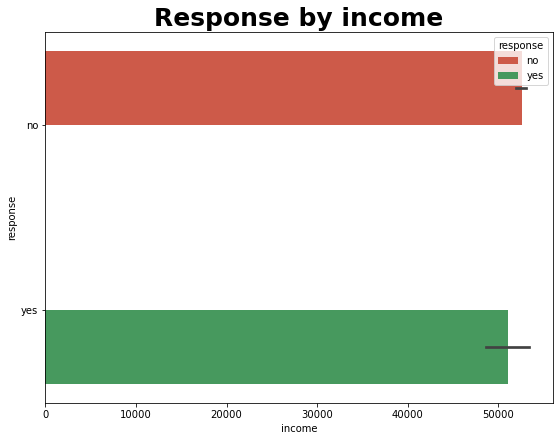

In [68]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Response by income', size='25', fontweight='bold')

sns.barplot(x = response_channel['income'],y = response_channel['response'], hue = response_channel['response'], palette=palette_alive)